# Домашнее задание №5

## Подготовительный этап

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Задание №1
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).
---------------
Возьмём распределение Колмогорова-Смирнова [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstwobign.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstwobign.html)

In [2]:
# генерируем выборку из распределения
# значение параметра `a` возьмём равным 2
ks_dist = sts.kstwobign()
sample = ks_dist.rvs(size=100)

In [3]:
sample

array([0.93608948, 0.81379207, 0.98272202, 1.02068725, 0.76848157,
       0.9755352 , 1.09258936, 1.19113285, 0.75152603, 1.02045038,
       0.60370972, 0.8751073 , 0.79208311, 0.51148863, 0.92583442,
       0.73227761, 1.1102374 , 0.94192612, 1.10978467, 1.31898909,
       0.63469755, 0.80852675, 1.05296511, 1.00812777, 1.00845336,
       0.92764553, 0.59724944, 0.82591491, 0.80157957, 0.84375382,
       1.03933141, 0.66469766, 0.67082236, 1.11822967, 0.79124257,
       0.88761292, 1.6925526 , 0.87341694, 0.91694706, 0.66631691,
       0.76324573, 0.72497796, 0.73951102, 0.60487546, 0.87330569,
       0.8440598 , 0.75955795, 0.62134682, 0.9941037 , 1.18178993,
       0.76516338, 0.4964513 , 1.03657927, 0.86377358, 0.93416733,
       1.00299963, 0.82063687, 0.67646006, 0.88771755, 0.4642193 ,
       0.65641539, 1.27618199, 1.03694382, 0.76357678, 0.76880432,
       0.80883581, 0.57569489, 0.89878149, 0.75760878, 0.52788109,
       1.61898611, 0.68561145, 0.8226356 , 0.79578839, 1.10545

In [4]:
sample.dtype

dtype('float64')

In [5]:
real_mean = ks_dist.mean()

In [6]:
real_var = ks_dist.var()

In [7]:
print(
    f'Настоящие параметры случайной величины - среднее = {real_mean:.5f}; дисперсия = {real_var:.5f}'
)

Настоящие параметры случайной величины - среднее = 0.86873; дисперсия = 0.06777


## Построим гистограмму выборки и теоретическую плотность распределения

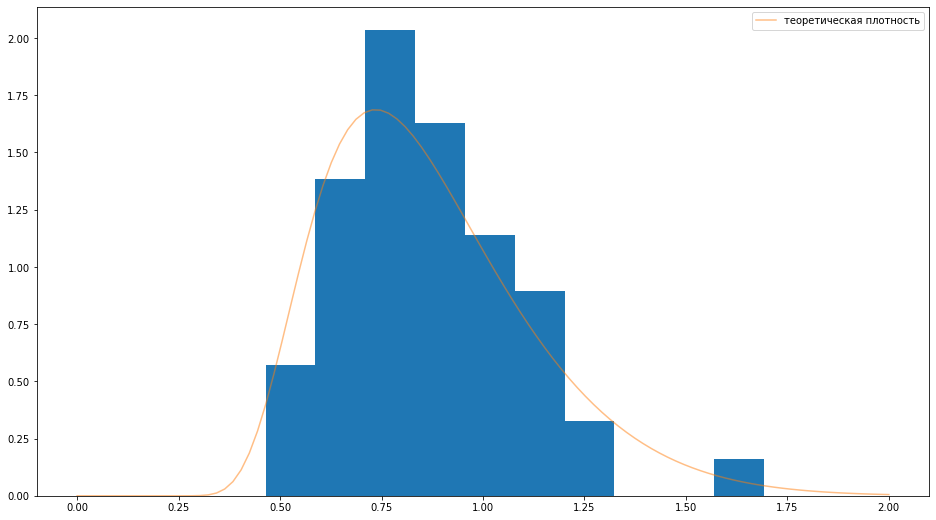

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.hist(sample, density=True)
x = np.linspace(0,2,100)
pdf = ks_dist.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [9]:
# рассчитаем выборочное среднее и выборочную дисперсию
s_mean = sample.mean()
s_var = sample.var()
print(
    f'Выборочные параметры случайной величины - среднее = {s_mean:.5f}; дисперсия = {s_var:.5f}'
)

Выборочные параметры случайной величины - среднее = 0.86945; дисперсия = 0.04977


## Оценим распределение выборочного среднего для разных объёмов выборок

Для этого построим на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используем настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

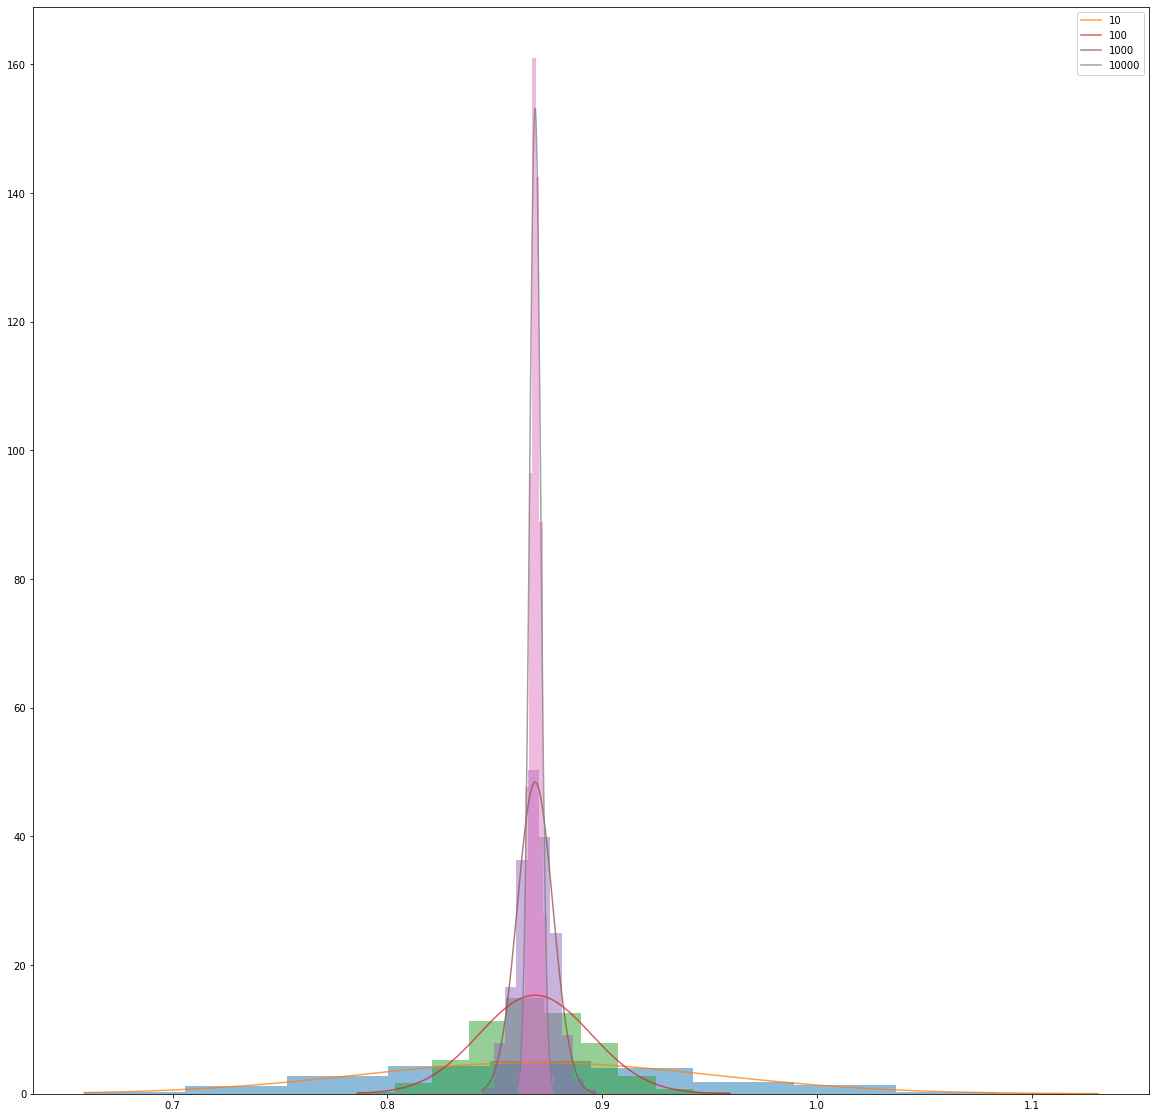

In [14]:
# строим
plt.figure(figsize=(20, 20))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    # создаём набор выборочных средних
    means = []
    for i in range(1000):
        means.append(np.mean(ks_dist.rvs(N)))

    # построим гистограмму плотности вероятности для выборочных средних
    plt.hist(means, alpha=0.5, density=True)

    # создаём нормальное распределение с необходимыми параметрами
    norm_dist = sts.norm(loc=real_mean, scale=ks_dist.std() / np.sqrt(N))

    # рассчитываем точки графика теоретического распределения
    x = np.linspace(np.min(means), np.max(means), 100)
    pdf = norm_dist.pdf(x)

    # рисуем график
    plt.plot(x, pdf, alpha=0.75)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Исходя из полученного графика, можно сделать заключение, что для выбранного распределения апроксимация распределения выборочного среднего работает **хорошо**

## Доверительный интервал на основе ЦПТ

Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения *total day calls*, используя центральную предельную теорему в разбиении по колонке *churn* (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр `ddof=1`).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from `statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv')

In [16]:
display(data)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [18]:
import statsmodels.stats.weightstats as ssw

In [24]:
for ch in [True, False]:
    local_data = data.query('churn == @ch')['total day calls'].to_list()
    print(f'Посчитаем доверительный интервал для churn = {ch}\n')
    print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
        np.mean(local_data) - 1.96 * np.sqrt(np.var(local_data)/len(local_data)), np.mean(local_data) + 1.96 * np.sqrt(np.var(local_data)/len(local_data)))
    )

    print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
        ssw._zconfint_generic(np.mean(local_data),  np.std(local_data, ddof=1), alpha=0.95, alternative='two-sided')
    ))
    print('-------------------------------------\n')

Посчитаем доверительный интервал для churn = True

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41262047786196, 103.2581869755542] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
-------------------------------------

Посчитаем доверительный интервал для churn = False

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55630252675442, 101.01001326271927] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274126, 101.52482464673243) 
-------------------------------------



Для клиентов в оттоке доверительный интервал, полученный по ЦПТ при известной дисперсии шире, чем полученный методом `_zconfint_generic`. Для клиентов, который не вошли в отток, ситуация противоположная - доверительный интервал, полученный по ЦПТ уже